# **Cohort Retention Analysis**

# **Collaborators:**


*   Fatika Rahma Sanjaya
*   Tigfhar Ahmadjayadi
*   Bagas Surya Prakasa




In [ ]:
#Import Library
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import cufflinks as cf
cf.go_offline()

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **United States E-Commerce records 2020**
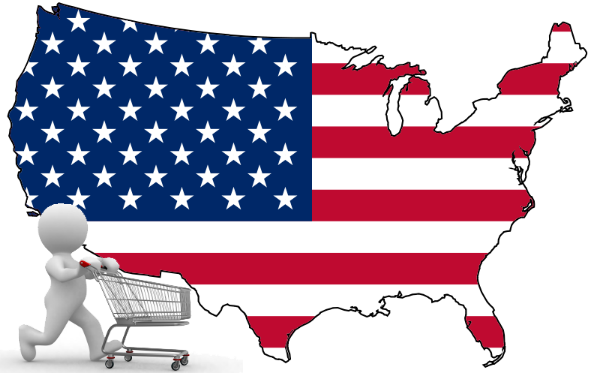

# **Latar Belakang:**

E-commerce telah menjadi salah satu sektor yang berkembang pesat, terutama di Amerika Serikat (AS). Pertumbuhan teknologi dan perubahan perilaku konsumen telah mengubah cara orang berbelanja. Untuk memahami pola pembelian dan retensi pelanggan di industri e-commerce, analisis data menjadi penting. Salah satu sumber data yang kaya adalah dataset dari Kaggle yang berisi catatan transaksi e-commerce di AS pada tahun 2020. Dataset ini mencakup informasi penting seperti tanggal pesanan, mode pengiriman, identifikasi pelanggan, kategori produk, penjualan, jumlah barang yang dibeli, diskon, dan keuntungan.

E-commerce dengan kategori produk penjualan :
Technologi, Furniture , dan Office Supplies.

# **Rumusan Masalah:**
1. Bagaimana tingkat loyalitas customer e-commerce USA di tahun 2020?

# **Tujuan**:
Menganalisis tingkat retensi kohort pada Catatan E-Commerce Amerika Serikat tahun 2020 untuk memahami berapa banyak pelanggan dari setiap kohort yang terus melakukan pembelian di bulan-bulan berikutnya.



# **Stakeholder (Pihak yang Berkepentingan):**

Stakeholder dalam konteks analisis cohort retention dapat mencakup berbagai pihak yang memiliki kepentingan dalam kesehatan dan kinerja bisnis e-commerce. Ini bisa termasuk:
*   Tim Marketing dan Customer Service







# **Metodologi:**
* **Segmentasi Kohort:** Membagi pelanggan ke dalam kohort-kohort berdasarkan bulan pembelian pertama mereka. Ini memungkinkan kita untuk melacak perilaku berbagai kelompok pelanggan dari waktu ke waktu.
* **Analisis Retensi:** Menghitung tingkat retensi kohort untuk memahami berapa banyak pelanggan dari setiap kohort yang terus melakukan pembelian di bulan-bulan berikutnya.
* **Visualisasi :** Menyajikan temuan melalui visualisasi kurva retensi kohort dan analisis heatmap.

In [ ]:
## Read data csv

In [ ]:
df=pd.read_csv('https://drive.google.com/uc?export=download&id=1-VvplaIl3_Yh00knKz8FOpqRUxuGRbNh', encoding='latin1')
display(df.head(3),df.tail(3))

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280


,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
3311,30-12-20,5092,CA-2017-156720,Standard Class,JM-15580,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048


In [ ]:
# Melihat jumlah baris dan kolom pada DataFrame
df.shape

(3312, 19)

In [ ]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
#Jumlah unique values per kolom
df.nunique()

Order Date       322
Row ID          3312
Order ID        1687
Ship Mode          4
Customer ID      693
Segment            3
Country            1
City             350
State             47
Postal Code      437
Region             4
Product ID      1525
Category           3
Sub-Category      17
Product Name    1511
Sales           2552
Quantity          14
Discount          12
Profit          2881
dtype: int64

In [ ]:
# Cek Missing Values
df.isna().sum()

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
# Cek nilai duplikat
df.duplicated().sum()

0

In [ ]:
#statistik deskriptif
display(df.describe(), df.describe(include='object'))

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


,Order Date,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312
unique,322,1687,4,693,3,1,350,47,4,1525,3,17,1511
top,02-09-20,CA-2017-100111,Standard Class,SV-20365,Consumer,United States,New York City,California,West,FUR-CH-10003774,Office Supplies,Binders,Easy-staple paper
freq,36,14,1897,20,1668,3312,306,663,1095,8,2002,500,16


In [ ]:
retention = pd.read_csv('https://drive.google.com/uc?export=download&id=1-VvplaIl3_Yh00knKz8FOpqRUxuGRbNh', encoding='latin1',
                 dtype={"Customer ID":str,
                        "Order Date":str,
                            },
                      parse_dates=['Order Date']
                     )
retention

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [ ]:
retention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    3312 non-null   datetime64[ns]
 1   Row ID        3312 non-null   int64         
 2   Order ID      3312 non-null   object        
 3   Ship Mode     3312 non-null   object        
 4   Customer ID   3312 non-null   object        
 5   Segment       3312 non-null   object        
 6   Country       3312 non-null   object        
 7   City          3312 non-null   object        
 8   State         3312 non-null   object        
 9   Postal Code   3312 non-null   int64         
 10  Region        3312 non-null   object        
 11  Product ID    3312 non-null   object        
 12  Category      3312 non-null   object        
 13  Sub-Category  3312 non-null   object        
 14  Product Name  3312 non-null   object        
 15  Sales         3312 non-null   float64 

In [ ]:
#step 1
#define cohort_month
retention['cohort_month']=retention.groupby('Customer ID')['Order Date'].transform("min").dt.to_period('M')
retention.sample(5)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,cohort_month
1871,2020-09-15,6756,CA-2017-124205,Standard Class,TC-21145,Corporate,United States,Lakewood,New Jersey,8701,East,FUR-FU-10002445,Furniture,Furnishings,"DAX Two-Tone Rosewood/Black Document Frame, De...",47.400,5,0.0,18.9600,2020-09
657,2020-04-24,5527,CA-2017-166933,Standard Class,MG-17890,Home Office,United States,Santa Barbara,California,93101,West,OFF-FA-10002676,Office Supplies,Fasteners,Colored Push Pins,1.810,1,0.0,0.6516,2020-04
96,2020-01-21,2684,CA-2017-127026,Standard Class,MH-18115,Home Office,United States,Jackson,Michigan,49201,Central,TEC-PH-10003601,Technology,Phones,Ativa D5772 2-Line 5.8GHz Digital Expandable C...,164.990,1,0.0,49.4970,2020-01
2978,2020-07-12,3898,CA-2017-134285,Standard Class,DS-13180,Corporate,United States,San Antonio,Texas,78207,Central,OFF-PA-10000304,Office Supplies,Paper,Xerox 1995,15.552,3,0.2,5.4432,2020-03
2875,2020-01-12,7122,CA-2017-166926,Standard Class,SO-20335,Consumer,United States,Seattle,Washington,98105,West,OFF-PA-10001593,Office Supplies,Paper,Xerox 1947,41.860,7,0.0,18.8370,2020-01


In [ ]:
#step 2
#define current_transaction_month
retention['current_transaction_month']=retention['Order Date'].dt.to_period('M')
retention=retention[['Customer ID', 'cohort_month','current_transaction_month']]
retention.drop_duplicates(inplace=True)
retention.sample(3)

,Customer ID,cohort_month,current_transaction_month
2955,KE-16420,2020-04,2020-04
1036,SB-20170,2020-09,2020-12
534,DM-13345,2020-08,2020-08


In [ ]:
#Step 3
# agregasi
# `jumlah`unique current month akan sama dengan uniqe period distance
cohort_retention=retention.groupby(['cohort_month','current_transaction_month'])['Customer ID'].count().reset_index()
cohort_retention.columns=['cohort_month', 'current_transaction_month', 'count_user']
cohort_retention.sample(5)

,cohort_month,current_transaction_month,count_user
13,2020-02,2020-03,13


In [ ]:
#step 4
from operator import attrgetter
#define period number/distance
cohort_retention['period_distance']=(cohort_retention['current_transaction_month']-cohort_retention['cohort_month']).apply(attrgetter('n'))
cohort_retention

,cohort_month,current_transaction_month,count_user,period_distance
0,2020-01,2020-01,96,0
1,2020-01,2020-02,10,1
2,2020-01,2020-03,18,2
3,2020-01,2020-04,23,3
4,2020-01,2020-05,7,4
...,...,...,...,...
73,2020-10,2020-11,10,1
74,2020-10,2020-12,4,2
75,2020-11,2020-11,29,0
76,2020-11,2020-12,5,1


In [ ]:
# Simpan DataFrame ke dalam file CSV
cohort_retention.to_csv('cohort_retention.csv', index=False)

In [ ]:
#step 5
#pivot : index =cohort_month, columns=period_distance, values=count_user
cohort_retention_pivot=cohort_retention.pivot_table(
index='cohort_month',
columns='period_distance',
values='count_user'
)
cohort_retention_pivot

period_distance,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2020-01,96.0,10.0,18.0,23.0,7.0,13.0,11.0,19.0,22.0,13.0,17.0,19.0
2020-02,90.0,13.0,13.0,8.0,11.0,15.0,15.0,18.0,15.0,23.0,15.0,NaN
2020-03,111.0,24.0,13.0,17.0,18.0,10.0,22.0,17.0,26.0,20.0,NaN,NaN
2020-04,65.0,14.0,14.0,11.0,12.0,19.0,11.0,18.0,14.0,NaN,NaN,NaN
2020-05,63.0,9.0,7.0,10.0,10.0,9.0,19.0,13.0,NaN,NaN,NaN,NaN
2020-06,56.0,6.0,12.0,13.0,10.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2020-07,42.0,9.0,9.0,4.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,29.0,5.0,6.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,48.0,9.0,15.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#step 6
#convert to percentage
cohort_size=cohort_retention_pivot.iloc[:,0]
cohort_retention_final=cohort_retention_pivot.divide(cohort_size,axis=0)
cohort_retention_final

period_distance,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2020-01,1.0,0.104167,0.187500,0.239583,0.072917,0.135417,0.114583,0.197917,0.229167,0.135417,0.177083,0.197917
2020-02,1.0,0.144444,0.144444,0.088889,0.122222,0.166667,0.166667,0.200000,0.166667,0.255556,0.166667,NaN
2020-03,1.0,0.216216,0.117117,0.153153,0.162162,0.090090,0.198198,0.153153,0.234234,0.180180,NaN,NaN
2020-04,1.0,0.215385,0.215385,0.169231,0.184615,0.292308,0.169231,0.276923,0.215385,NaN,NaN,NaN
2020-05,1.0,0.142857,0.111111,0.158730,0.158730,0.142857,0.301587,0.206349,NaN,NaN,NaN,NaN
2020-06,1.0,0.107143,0.214286,0.232143,0.178571,0.214286,0.196429,NaN,NaN,NaN,NaN,NaN
2020-07,1.0,0.214286,0.214286,0.095238,0.166667,0.119048,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,1.0,0.172414,0.206897,0.172414,0.241379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,1.0,0.187500,0.312500,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Heatmap Retention

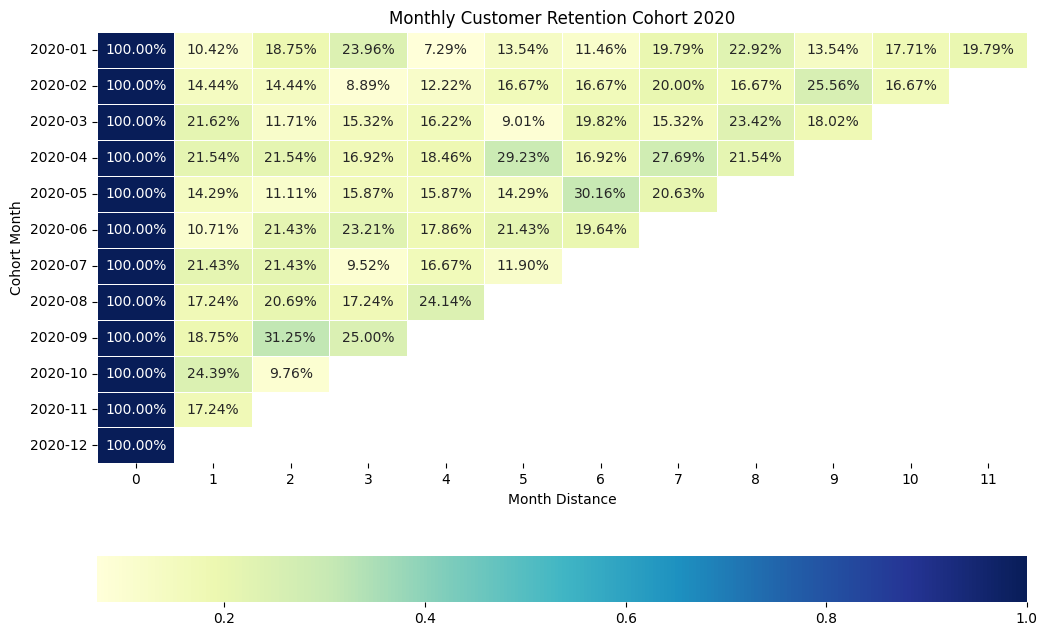

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.heatmap(cohort_retention_final,
              annot=True,
              fmt='.2%',
               linewidths=0.5,
              cmap='YlGnBu',
              cbar_kws={'orientation':'horizontal'},
               annot_kws={'size': 10})
ax.set_title('Monthly Customer Retention Cohort 2020')
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Month Distance')
plt.show()

In [ ]:
df_lineplot=cohort_retention.copy()
df_lineplot

,cohort_month,current_transaction_month,count_user,period_distance
0,2020-01,2020-01,96,0
1,2020-01,2020-02,10,1
2,2020-01,2020-03,18,2
3,2020-01,2020-04,23,3
4,2020-01,2020-05,7,4
...,...,...,...,...
73,2020-10,2020-11,10,1
74,2020-10,2020-12,4,2
75,2020-11,2020-11,29,0
76,2020-11,2020-12,5,1


In [ ]:
#convert date columns to str
df_lineplot['cohort_month']=df_lineplot['cohort_month'].astype(str)
df_lineplot['current_transaction_month']=df_lineplot['current_transaction_month'].astype(str)

#convert to percentage
df_lineplot_state=df_lineplot.groupby(['cohort_month']).agg({'count_user':'max'})
df_lineplot_state

#create percent
df_plot=round(100*df_lineplot.set_index(['cohort_month']).div(df_lineplot_state, level='cohort_month'),2)
df_plot=df_plot.reset_index()[['cohort_month','count_user']].rename(columns={'count_user':'percentage_retention',
                                                                            'period_number':'period_distance'})
# display(df_lineplot,df_lineplot_state,df_plot)
df_plot

#add other columns
df_plot['current_transaction_month']=df_lineplot['current_transaction_month']
df_plot['period_distance']=df_lineplot['period_distance']
df_plot

,cohort_month,percentage_retention,current_transaction_month,period_distance
0,2020-01,100.00,2020-01,0
1,2020-01,10.42,2020-02,1
2,2020-01,18.75,2020-03,2
3,2020-01,23.96,2020-04,3
4,2020-01,7.29,2020-05,4
...,...,...,...,...
73,2020-10,24.39,2020-11,1
74,2020-10,9.76,2020-12,2
75,2020-11,100.00,2020-11,0
76,2020-11,17.24,2020-12,1


## Lineplot Retention

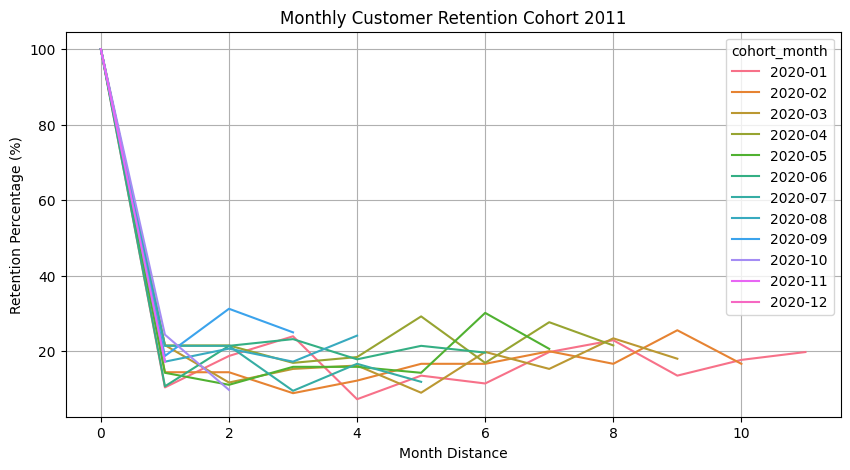

In [ ]:
#Create Lineplot

plt.figure(figsize=(10,5))
ax=sns.lineplot(df_plot,
              x='period_distance',
              y='percentage_retention',
                hue='cohort_month')
ax.set_title('Monthly Customer Retention Cohort 2011')
ax.set_ylabel('Retention Percentage (%)')
ax.set_xlabel('Month Distance')
plt.grid()
plt.show()

In [ ]:
# Menyimpan DataFrame cohort_retention_final ke dalam file CSV
cohort_retention_final.to_csv("heatmap_usa.csv", index=False)

# Menyimpan DataFrame df_plot ke dalam file CSV
df_plot.to_csv("linepolot_usa.csv", index=False)


In [ ]:
cohort_retention_final.to_csv("cohort_retention_final.csv",index= False)

# **Analisis**


* Tren Retensi: Persentase retensi menurun seiring waktu, dimana jumlah pelanggan yang tetap aktif berkurang seiring berjalannya waktu setelah pendaftaran.

* Cohort Terbaik (Mengalami Peningkatan):

> Terdapat peningkatan yang signifikan pada `Cohort April` (18.46% ke 29.23%) hampir 11% dari bulan agustus ke bulan september.

> Selain itu pada `Cohort Mei` memiliki peningkatan paling tinggi (14.29% ke 30.16%) hampir 16% dari bulan oktober ke bulan november.

* Cohort Terburuk (Mengalami Penurunan):

> Penurunan paling drastis dari awal pendaftaran ke bulan pertama yaitu pada `Cohort Januari` (dari 100% ke 10.42%) mengalami penurunan `hampir 90%`. Pada `Cohort Januari` juga mengalami penurunan per bulan paling besar yaitu Bulan April ke Bulan Mei (23.96% ke 7.29%) `mengalami penurunan hampir 17%.`


# **Kesimpulan**

Dari hasil analisis cohort dapat disimpulkan bahwa retensi pelanggan menurun seiring waktu. Namun, beberapa kohort menunjukkan performa retensi yang lebih baik. Analisis lebih lanjut dapat membantu untuk memahami penyebab spesifik dari tren ini dan mengembangkan strategi untuk meningkatkan retensi pelanggan di masa mendatang.

Dashboard Looker:
[Cohort Retention Dashboard](https://lookerstudio.google.com/reporting/a9a76a5d-1312-42d1-8694-b26dddf5e07a/page/1M)